# Workgroup3
- Luis
- Álvaro
- Diego


## 1. What is Multicollinearity?


## 2. Analyzing RCT data with Precision Adjustment

Replicate the results of the script analyzing_rct_reemployment_experiment

In [1]:
import Pkg


#Pkg.add("DataFrames")
#Pkg.add("FilePaths")
#Pkg.add("Queryverse")
#Pkg.add("GLM")
#Pkg.add("StatsModels")
#Pkg.add("Combinatorics")
#Pkg.add("Iterators")
#Pkg.add("CategoricalArrays")
#Pkg.add("StatsBase")
#Pkg.add("Lasso")
#Pkg.add("TypedTables")
#Pkg.add("MacroTools")
#Pkg.add("NamedArrays")
#Pkg.add("DataTables")
#Pkg.add("Latexify")
#Pkg.add("PrettyTables")
#Pkg.add("TypedTables")
#Pkg.add("TexTables")
#Pkg.add("StatsModels")
#Pkg.add("DataTables")
#Pkg.add("FilePaths")
#Pkg.add("Combinatorics")
#Pkg.add("CategoricalArrays")
#Pkg.add("TypedTables")
#Pkg.add("MacroTools")

using GLM, StatsModels
using DataTables
using DelimitedFiles, DataFrames, Lasso
using FilePaths
using StatsModels, Combinatorics
using CategoricalArrays
using StatsBase, Statistics
using TypedTables
using MacroTools
using NamedArrays
using PrettyTables # Dataframe or Datatable to latex
using TexTables # pretty regression table and tex outcome

In [2]:
# Loading data

mat, head = readdlm("../../data/penn_jae.dat", header=true, Float64)
mat
df =DataFrame(mat, vec(head))
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,abdt,10693.6,10404.0,10691.0,10880.0,0,Float64
2,tg,2.56889,0.0,2.0,6.0,0,Float64
3,inuidur1,12.9148,1.0,10.0,52.0,0,Float64
4,inuidur2,12.1938,0.0,9.0,52.0,0,Float64
5,female,0.402142,0.0,0.0,1.0,0,Float64
6,black,0.116653,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363689,0.0,0.0,1.0,0,Float64
8,othrace,0.00575002,0.0,0.0,1.0,0,Float64
9,dep,0.444045,0.0,0.0,2.0,0,Float64


Focus on the Treatment group 2

In [3]:
# Filter control group and just treatment group number 2
#tg = treatment
penn = filter(row -> row[:tg] in [2,0], df)

describe(penn)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,abdt,10696.4,10404.0,10698.0,10880.0,0,Float64
2,tg,0.839848,0.0,0.0,2.0,0,Float64
3,inuidur1,13.0334,1.0,11.0,52.0,0,Float64
4,inuidur2,12.2511,0.0,10.0,52.0,0,Float64
5,female,0.400726,0.0,0.0,1.0,0,Float64
6,black,0.118817,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363196,0.0,0.0,1.0,0,Float64
8,othrace,0.00518852,0.0,0.0,1.0,0,Float64
9,dep,0.437911,0.0,0.0,2.0,0,Float64


In [4]:
#dummy for treatment
replace!(penn.tg, 2 => 1)
describe(penn)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,abdt,10696.4,10404.0,10698.0,10880.0,0,Float64
2,tg,0.419924,0.0,0.0,1.0,0,Float64
3,inuidur1,13.0334,1.0,11.0,52.0,0,Float64
4,inuidur2,12.2511,0.0,10.0,52.0,0,Float64
5,female,0.400726,0.0,0.0,1.0,0,Float64
6,black,0.118817,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363196,0.0,0.0,1.0,0,Float64
8,othrace,0.00518852,0.0,0.0,1.0,0,Float64
9,dep,0.437911,0.0,0.0,2.0,0,Float64


In [5]:
# change datatype for dep: string -> categorical
penn[!, :dep] = string.(penn[!,:dep])
penn[!, :dep] = categorical(penn[!,:dep])
describe(penn)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,abdt,10696.4,10404.0,10698.0,10880.0,0,Float64
2,tg,0.419924,0.0,0.0,1.0,0,Float64
3,inuidur1,13.0334,1.0,11.0,52.0,0,Float64
4,inuidur2,12.2511,0.0,10.0,52.0,0,Float64
5,female,0.400726,0.0,0.0,1.0,0,Float64
6,black,0.118817,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363196,0.0,0.0,1.0,0,Float64
8,othrace,0.00518852,0.0,0.0,1.0,0,Float64
9,dep,,0.0,,2.0,0,"CategoricalValue{String, UInt32}"


Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1

In [6]:
#Pkg.add("Gadfly")
using Gadfly

In [7]:
#subset for treatment and for control
tg = filter(row -> row[:tg] in [1], penn)
cg = filter(row -> row[:tg] in [0], penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…
1,10824.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,2.0
2,10824.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10747.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0
4,10831.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,1.0
5,10845.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,0.0
6,10831.0,0.0,9.0,9.0,1.0,0.0,0.0,0.0,1.0
7,10859.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,1.0
8,10516.0,0.0,15.0,15.0,1.0,0.0,0.0,0.0,0.0
9,10663.0,0.0,28.0,11.0,1.0,0.0,0.0,0.0,0.0


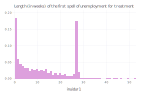

In [8]:
Gadfly.plot(tg, Coord.cartesian(xmin=0, xmax=52),
    layer(x = "inuidur1", Geom.histogram(bincount=52, density=true, limits=(min=0,)),
    color=[colorant"plum"]),
    Guide.title("Length (in weeks) of the first spell of unemployment for treatment")
)

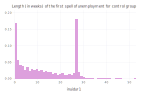

In [9]:
Gadfly.plot(cg, Coord.cartesian(xmin=0, xmax=52),
    layer(x = "inuidur1", Geom.histogram(bincount=52, density=true, limits=(min=0,)),
    color=[colorant"plum"]),
    Guide.title("Length (in weeks) of the first spell of unemployment for control group")
)
    #layer(x = "inuidur1", Geom.density , color=[colorant"black"]),

Carry out covariate balance check

In [10]:
# couples variables combinations 
    combinations_upto(x, n) = Iterators.flatten(combinations(x, i) for i in 1:n)

    # combinations without same couple
    expand_exp(args, deg::ConstantTerm) =
        tuple(((&)(terms...) for terms in combinations_upto(args, deg.n))...)

    StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.Schema, ctx::Type) =
        apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

In [11]:
#basic model 
reg1 = @formula(tg ~ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg1 = apply_schema(reg1, schema(reg1, penn))

FormulaTerm
Response:
  tg(continuous)
Predictors:
  female(continuous)
  black(continuous)
  othrace(continuous)
  dep(DummyCoding:3→2)
  q2(continuous)
  q3(continuous)
  q4(continuous)
  q5(continuous)
  q6(continuous)
  agelt35(continuous)
  agegt54(continuous)
  durable(continuous)
  lusd(continuous)
  husd(continuous)
  female(continuous) & black(continuous)
  female(continuous) & othrace(continuous)
  female(continuous) & dep(DummyCoding:3→2)
  female(continuous) & q2(continuous)
  female(continuous) & q3(continuous)
  female(continuous) & q4(continuous)
  female(continuous) & q5(continuous)
  female(continuous) & q6(continuous)
  female(continuous) & agelt35(continuous)
  female(continuous) & agegt54(continuous)
  female(continuous) & durable(continuous)
  female(continuous) & lusd(continuous)
  female(continuous) & husd(continuous)
  black(continuous) & othrace(continuous)
  black(continuous) & dep(DummyCoding:3→2)
  black(continuous) & q2(continuous)
  black(continuous) & q3(

In [12]:
m1 = lm(reg1, penn)
table = regtable( "Covariate Balance Check" => m1) 


m1 #table

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

tg ~ 1 + female + black + othrace + dep + q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + durable + lusd + husd + female & black + female & othrace + female & dep + female & q2 + female & q3 + female & q4 + female & q5 + female & q6 + female & agelt35 + female & agegt54 + female & durable + female & lusd + female & husd + black & othrace + black & dep + black & q2 + black & q3 + black & q4 + black & q5 + black & q6 + black & agelt35 + black & agegt54 + black & durable + black & lusd + black & husd + othrace & dep + othrace & q2 + othrace & q3 + othrace & q4 + othrace & q5 + othrace & q6 + othrace & agelt35 + othrace & agegt54 + othrace & durable + othrace & lusd + othrace & husd + dep & q2 + dep & q3 + dep & q4 + dep & q5 + dep & q6 + dep & agelt35 + dep & agegt54 + dep & durable + dep & lusd + dep & husd + q2 & q

**A. Run classical 2-sample approach, no adjustment (CL)**

In [13]:
#regression
# Y = inuidur1, D = treatment , X = covariates
ols_cl = lm(@formula(log(inuidur1) ~ tg), penn)

#table
table1 = regtable( "No adjustment model (CL)" => ols_cl)

            | No adjustment model (CL) 
            |           (1)            
---------------------------------------
(Intercept) |                 2.057*** 
            |                  (0.021) 
         tg |                 -0.079** 
            |                  (0.032) 
---------------------------------------
          N |                     5782 
      $R^2$ |                    0.001 


**B. Run classical linear regression adjustment (CRA)**

In [14]:
# adding controls
# Omitted dummies: q1, nondurable, muld

#model
reg2 = @formula(log(inuidur1) ~ tg + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg2 = apply_schema(reg2, schema(reg2, penn))

#regression
ols_cra = lm(reg2, penn)
table2 = regtable("CRA model" => ols_cra)

#adding controls is not sufficient to huge differente in the estimated coefficient. Seems like Y is not correlated to covariates.


                   | CRA model 
                   |    (1)    
-------------------------------
       (Intercept) |  2.447*** 
                   |   (0.381) 
                tg |  -0.071** 
                   |   (0.032) 
            female | -0.943*** 
                   |   (0.314) 
             black | -0.508*** 
                   |   (0.146) 
           othrace |    -0.039 
                   |   (1.140) 
          dep: 1.0 |     0.280 
                   |   (0.451) 
          dep: 2.0 |     0.168 
                   |   (0.394) 
                q2 |     0.027 
                   |   (0.385) 
                q3 |    -0.354 
                   |   (0.384) 
                q4 |    -0.338 
                   |   (0.384) 
                q5 |    -0.178 
                   |   (0.383) 
                q6 |    -0.446 
                   |   (0.381) 
           agelt35 |    -0.326 
                   |   (0.326) 
           agegt54 |    -0.155 
                   |   (0.580) 
        

**C. Run interactive regression adjustment (IRA)**

In [15]:
#Previously, demean the whole dataset

# demean function
function desv_mean(a)
    A = mean(a, dims = 1)
    M = zeros(Float64, size(X,1), size(X,2))
    
    for i in 1:size(a,2)
          M[:,i] = a[:,i] .- A[i]
    end
    return M
end    



# Matrix Model & demean
X = StatsModels.modelmatrix(reg1.rhs,penn) #interations matrix from model 1
X = desv_mean(X) # matrix format

5782×119 Matrix{Float64}:
 -0.400726  -0.118817  -0.00518852  -0.116569  …  -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852   0.883431  …   0.945002   -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852   0.883431     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852   0.883431     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569  …  -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0

In [16]:
#model using interactive variables:

# Dependet and treatment
Y = select(penn, [:inuidur1,:tg]) 

#interactive covariates
X = DataFrame(hcat(X, Matrix(select(penn, [:tg])).*X), :auto)  

#special dataset for this model (join Y, treatment and covariates)
base = hcat(Y, X) 

base.inuidur1 = log.(base.inuidur1)  # log(inuidur1)

terms = term.(names(base)) # term.() let us to get all variables as objects

#interactive regression model

ols_ira  = lm(terms[1] ~ sum(terms[2:end]), base)


table3 = regtable("Interactive model (IRA)" => ols_ira)

#terms[1] : select first variable. In this case, oucome of interest 
#sum(terms[2:end]) : independent variables as regresors in the linear regression

            | Interactive model (IRA) 
            |           (1)           
--------------------------------------
(Intercept) |                2.057*** 
            |                 (0.021) 
         tg |                -0.072** 
            |                 (0.032) 
         x1 |                  -0.666 
            |                 (0.445) 
         x2 |               -0.863*** 
            |                 (0.270) 
         x3 |                  -1.735 
            |                 (2.173) 
         x4 |                   0.036 
            |                 (0.685) 
         x5 |                   0.212 
            |                 (0.497) 
         x6 |                   0.000 
            |                   (NaN) 
         x7 |                -0.367** 
            |                 (0.150) 
         x8 |                  -0.225 
            |                 (0.154) 
         x9 |                  -0.117 
            |                 (0.149) 
        x10 |            

**D. Run interactive regression adjustment (IRA) using Lasso**

In [17]:
X = StatsModels.modelmatrix(reg2.rhs,penn) #using model 2
X = desv_mean(X)


D = DataFrame([X[:,1]], :auto)  # Treatment varaible

rename!(D, Dict(:x1 => :tg)) #rename x1 -> tg

X = DataFrame(hcat(X[:,2:end], X[:,1].*X[:,2:end]), :auto)  # Join Controls (X) + T4*X "interactive"

Y = select(penn, [:inuidur1]) #select just inuidur1

Y.inuidur1 = log.(Y.inuidur1)  # log(inuidur1)


5782-element Vector{Float64}:
 2.8903717578961645
 1.9459101490553132
 0.0
 3.295836866004329
 2.995732273553991
 3.295836866004329
 3.295836866004329
 2.1972245773362196
 3.295836866004329
 3.295836866004329
 2.70805020110221
 1.0986122886681098
 3.332204510175204
 ⋮
 2.302585092994046
 2.995732273553991
 3.295836866004329
 3.295836866004329
 2.70805020110221
 0.0
 3.1354942159291497
 1.791759469228055
 2.6390573296152584
 2.1972245773362196
 1.3862943611198906
 3.295836866004329

In [32]:
#terms = term.(names(base)) # all terms  
#model = terms[1] ~ sum(terms[2:end])
#lazso = fit(LassoModel,terms[1] ~ sum(terms[2:end]), base; standardize=false, α = 0.1)
#coef(lasso)[2]
#table3 = regtable("Lasso adjustment model" => lasso)

LoadError: UndefVarError: lasso not defined

In [19]:
#interactions
X


,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.400726,-0.118817,-0.00518852,-0.116569,0.839329,-0.200104,-0.235559,-0.223279
2,-0.400726,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,0.764441,-0.223279
3,-0.400726,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,-0.223279
4,-0.400726,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,0.776721
5,0.599274,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,0.776721
6,-0.400726,-0.118817,-0.00518852,0.883431,-0.160671,-0.200104,-0.235559,-0.223279
7,0.599274,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,-0.223279
8,0.599274,-0.118817,-0.00518852,0.883431,-0.160671,-0.200104,-0.235559,-0.223279
9,0.599274,-0.118817,-0.00518852,0.883431,-0.160671,-0.200104,-0.235559,-0.223279


In [30]:
 import Pkg; Pkg.add("Distributions")
 import Pkg; Pkg.add("Tables")
 import Pkg; Pkg.add("TableOperations")
 import Pkg; Pkg.add("StatsBase")
 import Pkg; Pkg.add("FreqTables")
 import Pkg; Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\Luis\.julia\environments\v1.7\Project.toml`
  [bd369af6] + Tables v1.7.0
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\Luis\.julia\environments\v1.7\Project.toml`
  [ab02a1b2] + TableOperations v1.2.0
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
   Installed FreqTables ─ v0.4.5
    Updating `C:\Users\Luis\.julia\environments\v1.7\Project.toml`
  [da1fdf0e] + FreqTables v0.4.5
    Updating `C:\Users\Luis\.julia\environments\v1.7\Manifest.toml`
  [da1fdf

In [31]:
include("../Julia_Notebooks/hdmjl/hdmjl.jl")

In [ ]:
D_reg_0  = rlasso_arg( X, D, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

In [ ]:
D_resid = rlasso(D_reg_0)


In [ ]:
D_resid = rlasso(D_reg_0)["residuals"]


In [ ]:
Y_reg_0  = rlasso_arg( X, Y, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )


In [ ]:
Y_resid = rlasso(Y_reg_0)["residuals"]


In [ ]:
D_resid = reshape(D_resid, length(D_resid), 1)
